In [66]:
'''
    scikit-learn构建模型
    第一题
'''
import numpy
import pandas
from sklearn.datasets import load_iris
iris = load_iris()
iris

iris['data']
iris['data'].shape
iris['feature_names']
iris['target']
iris['target'].shape
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
concat = pandas.concat([pandas.DataFrame(iris['data']),
                        pandas.DataFrame(iris['target'])],axis=1)    #0是纵轴，1是横轴
concat.columns=['花萼长度','花萼宽度','花瓣长度','花瓣宽度','类型']
concat


,花萼长度,花萼宽度,花瓣长度,花瓣宽度,类型
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [68]:
#将数据集划分为训练集和测试集
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()  #将数据集赋值给diabetes 变量
# print('diabetes数据集的长度为：',len(diabetes))   #使用len 查看数据集的长度
# print('diabetes数据集的类型：',type(diabetes))      #使用type函数查看数据集的类型
#print(diabetes['DESCR'])
diabetes_data = diabetes['data']    #特征
diabetes_target = diabetes['target']   #标签
diabetes_data.shape
diabetes_target.shape

(442,)

In [69]:
train_test_split(diabetes_data,diabetes_target,test_size=0.2)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(diabetes_data,diabetes_target,test_size=0.2)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [70]:
iris_data = iris['data']    #特征
iris_target = iris['target']    #标签
print(iris_data.shape)
print(iris_target.shape)
print('==================================')
xtrain,xtest,ytrain,ytest = train_test_split(iris_data,iris_target,test_size=0.3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(150, 4)
(150,)
(105, 4)
(45, 4)
(105,)
(45,)


In [71]:
#使用sklearn转换器进行数据预处理  --MinMaxScaler 标准化
from sklearn.preprocessing import MinMaxScaler
#生成规则 -> 初始化模型对象,将规则应用于训练集 -> 模型对象的训练 fit()
mxScaler = MinMaxScaler().fit(xtrain)
#将规则应用于训练集
New = mxScaler.transform(xtrain)
New

#使用sklearn进行数据预处理降维  

from sklearn.decomposition import PCA
#初始化模型对象
pca = PCA(n_components=5).fit(Xtrain)

ne = pca.transform(Xtrain)
ne.shape

(353, 5)

In [72]:
pca.explained_variance_ratio_   #降维后的个主成分方差值只占总方差的比例（一般看比例>9即可）


array([0.38768933, 0.15797352, 0.12640442, 0.09562678, 0.06437714])

In [73]:
'''
    离差标准化数据（最小 - 最大标准化）结果是将原始数据的数值映射到[0,1]区间
    公式：X^* = (X - MIN) / (MAX - MIN)
    如果想将映射数值改到[1,10]区间的方法
    公式：v' = [(X - MIN) / (MAX - MIN)] * (new_max - new_min) + new_min
    4、使用离差标准化(最大最小标准化)方法将训练集与测试集数据分别进行标准化。 
'''
iris_scale = MinMaxScaler().fit(xtrain)
iris_result = iris_scale.transform(xtrain)
iris_result

pca_iris = PCA(n_components=2).fit(xtrain)
new_iris = pca_iris.transform(xtrain)
new_iris.shape

(105, 2)

In [74]:
pca_iris.explained_variance_ratio_

array([0.93232299, 0.04648756])

In [75]:
#构建并评价决策树分类模型
#熵 表示随机变量不确定性的度量 H(X)
#引入数据，将数据集中的字符串转换为代表类别的数字，sklearn只识别数字
import pandas
from sklearn.preprocessing import LabelEncoder
student = pandas.read_csv('C:\\Users\\26440\\Desktop\\jupyter_ipynb\\python_source\\data\\决策树.csv',
                          encoding='gbk',sep='\t')
le = LabelEncoder()
for col in student.columns:
    student[col] = le.fit_transform(student[col])
student


,头发,声音,性别
0,1,0,1
1,0,0,1
2,0,0,1
3,1,1,0
4,0,1,0
5,0,0,0
6,1,0,0
7,1,0,0


In [76]:
#利用已有的训练数据，构建决策树模型，训练模型并预测
from sklearn.tree import DecisionTreeClassifier
#1.初始化模型
model = DecisionTreeClassifier(criterion='entropy')

#2、训练模型fit
Xt = student.loc[:,['头发','声音']] #特征
Yt = student['性别'] #标签
model.fit(Xt,Yt)

#3、使用决策树进行预测 predict
result = model.predict([[0,1]])     #声音细、头发长/短 -> 女
result

#4、计算分类的准确率 score
#print(model.score(Xt,Yt))

d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [77]:
from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier(criterion='entropy')
Model.fit(xtrain,ytrain)
Result = Model.score(xtrain,ytrain)
Result

1.0

In [84]:

pre_result = Model.predict(xtest)
print('预测结果：',pre_result)
print('真实结果：',ytest)
Result1 = sum(pre_result = ytest) / len(ytest)
Result1

预测结果： [1 2 1 0 2 1 0 1 2 0 2 1 0 0 0 2 0 2 0 1 1 0 1 1 1 0 1 1 1 2 0 0 2 2 2 1 0
 2 1 2 1 1 1 2 1]
真实结果： [1 2 1 0 2 1 0 1 2 0 2 1 0 0 0 2 0 2 0 1 1 0 1 1 1 0 2 1 1 2 0 0 2 2 2 2 0
 2 1 2 1 1 1 2 1]


TypeError: sum() takes at least 1 positional argument (0 given)

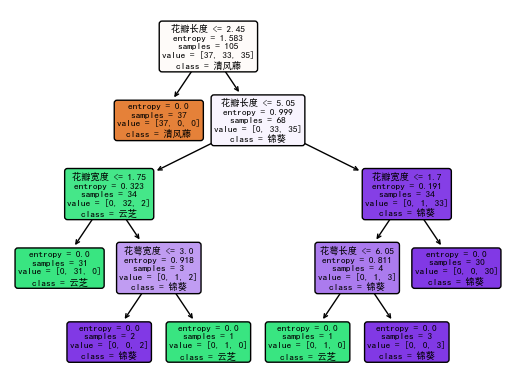

In [85]:
import matplotlib.pylab as plt
from sklearn import tree
#6、为了能直观地观察训练好的决策树，请利用matplotlib/graphviz库将构建好的决策树可视化
feature_names=['花萼长度','花萼宽度','花瓣长度','花瓣宽度']
class_names=["清风藤","云芝","锦葵"]
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
tree.plot_tree(Model,feature_names=feature_names,class_names=class_names,filled=True,rounded=True)
plt.show()